In [ ]:
import sys
from pathlib import Path

# Add the parent directory of the notebook to the Python path
sys.path.append(str(Path().resolve().parent))

In [9]:
from funcs.data_read import (
    read_txn_data, 
    #preprocess_txn_data, 
    #compute_lob_features, 
    #create_lob_dataset, 
    #merge_txn_and_lob
)

In [10]:
# read the data using the read_txn_data function

trx_df = read_txn_data(test=True,test_size=3)
#check the uniq days in the datatime colum
print(trx_df['datetime'].dt.date.unique())

[datetime.date(2018, 5, 31) datetime.date(2018, 6, 1)
 datetime.date(2018, 6, 30) datetime.date(2018, 7, 1)
 datetime.date(2018, 7, 31) datetime.date(2018, 8, 1)]


In [11]:
#print uniq hours in the datetime column
print(trx_df['datetime'].dt.hour.unique())
print(trx_df['datetime'].dt.minute.unique())
print(trx_df['datetime'].dt.second.unique())
#miliseconds in the datetime column
print("miliseconds")
print(trx_df['datetime'].dt.microsecond.unique())


[21 22 23  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
[13 18 19 20 21 22 25 34 37 39 40 42 46 48 52 55 58  3  6  8 33 38 53 44
 54 56 57  9 14 24 49 59 32 43  0 23 30 35 50 10  2  7 11 36  1 16 27 29
 41 47 28 17  4  5 45 15 31 12 51 26]
miliseconds
[0]


In [12]:
import pandas as pd
trx_df['datetime_precise'] = pd.to_datetime(trx_df['timestamp'], unit='ms')
print(trx_df['datetime_precise'].dt.date.unique())
print(trx_df['datetime_precise'].dt.hour.unique())
print(trx_df['datetime_precise'].dt.minute.unique())
print(trx_df['datetime_precise'].dt.second.unique())
print("miliseconds")
print(trx_df['datetime_precise'].dt.microsecond.unique())
mismatches = trx_df[trx_df['datetime_precise'] != trx_df['datetime_precise']]
print(mismatches)  

[datetime.date(2018, 5, 31) datetime.date(2018, 6, 1)
 datetime.date(2018, 6, 30) datetime.date(2018, 7, 1)
 datetime.date(2018, 7, 31) datetime.date(2018, 8, 1)]
[21 22 23  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59]
[13 18 19 20 21 22 25 34 37 39 40 42 46 48 52 55 58  3  6  8 33 38 53 44
 54 56 57  9 14 24 49 59 32 43  0 23 30 35 50 10  2  7 11 36  1 16 27 29
 41 47 28 17  4  5 45 15 31 12 51 26]
miliseconds
[0]
Empty DataFrame
Columns: [timestamp, price, datetime, cost, id, fee, fee1, order, symbol, amount, type, side, datetime_precise]
Index: []


In [13]:
# columns to keep:  datetime, price, cost, id, amount, side

trx_df = trx_df[['datetime', 'price', 'cost', 'id', 'amount', 'side']]
trx_df = trx_df.reset_index(drop=True)
print(trx_df.head(10))

                   datetime    price          cost        id    amount   side
0 2018-05-31 21:00:13+00:00  7538.34     75.383400  67405327  0.010000   sell
1 2018-05-31 21:00:18+00:00  7533.92     35.761333  67405331  0.004747   sell
2 2018-05-31 21:00:18+00:00  7535.44   2995.337400  67405330  0.397500   sell
3 2018-05-31 21:00:18+00:00  7536.00      7.536000  67405329  0.001000   sell
4 2018-05-31 21:00:18+00:00  7537.49    753.749000  67405328  0.100000   sell
5 2018-05-31 21:00:19+00:00  7533.88   7533.880000  67405334  1.000000    buy
6 2018-05-31 21:00:19+00:00  7533.88   7533.880000  67405333  1.000000    buy
7 2018-05-31 21:00:19+00:00  7533.92     27.177336  67405332  0.003607   sell
8 2018-05-31 21:00:20+00:00  7533.88  74267.541480  67405335  9.857808    buy
9 2018-05-31 21:00:21+00:00  7538.87    399.560110  67405336  0.053000   sell


# NANs

In [14]:
 # check for Na values in the dataframe

print(trx_df.isna().sum())





datetime    0
price       0
cost        0
id          0
amount      0
side        0
dtype: int64


# Outliers



In [15]:
# check for outliers in all the columns
print(trx_df.describe())

              price           cost            id        amount
count  76590.000000   76590.000000  7.659000e+04  7.659000e+04
mean    7326.922246    2232.548494  6.971494e+07  3.047333e-01
std      463.246611    8766.841948  1.692352e+06  1.194751e+00
min     6259.340000       0.000151  6.740533e+07  2.000000e-08
25%     7420.000000      22.959392  6.745252e+07  3.168690e-03
50%     7532.915000     245.596159  7.122101e+07  3.377622e-02
75%     7571.940000     889.599848  7.125798e+07  1.237500e-01
max     7777.000000  597948.214727  7.130282e+07  9.114360e+01


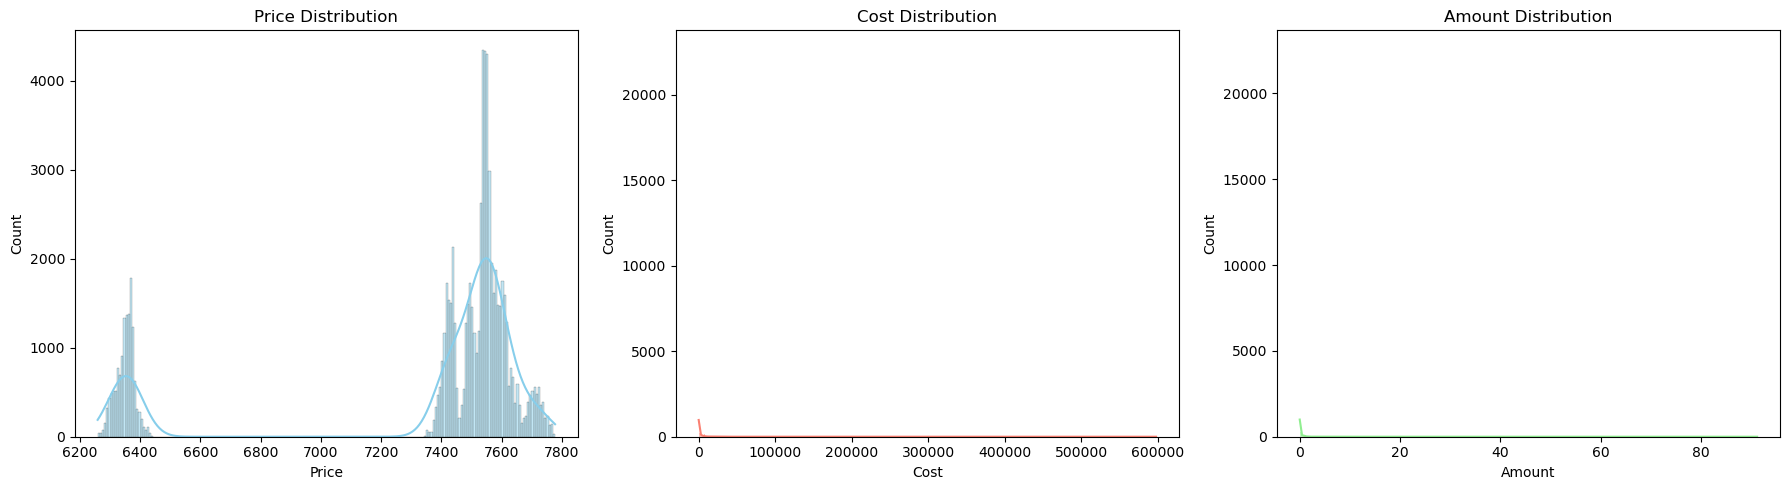

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot distributions
sns.histplot(trx_df['price'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Price Distribution')
axes[0].set_xlabel('Price')

sns.histplot(trx_df['cost'], kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Cost Distribution')
axes[1].set_xlabel('Cost')

sns.histplot(trx_df['amount'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Amount Distribution')
axes[2].set_xlabel('Amount')

plt.tight_layout()
plt.show()

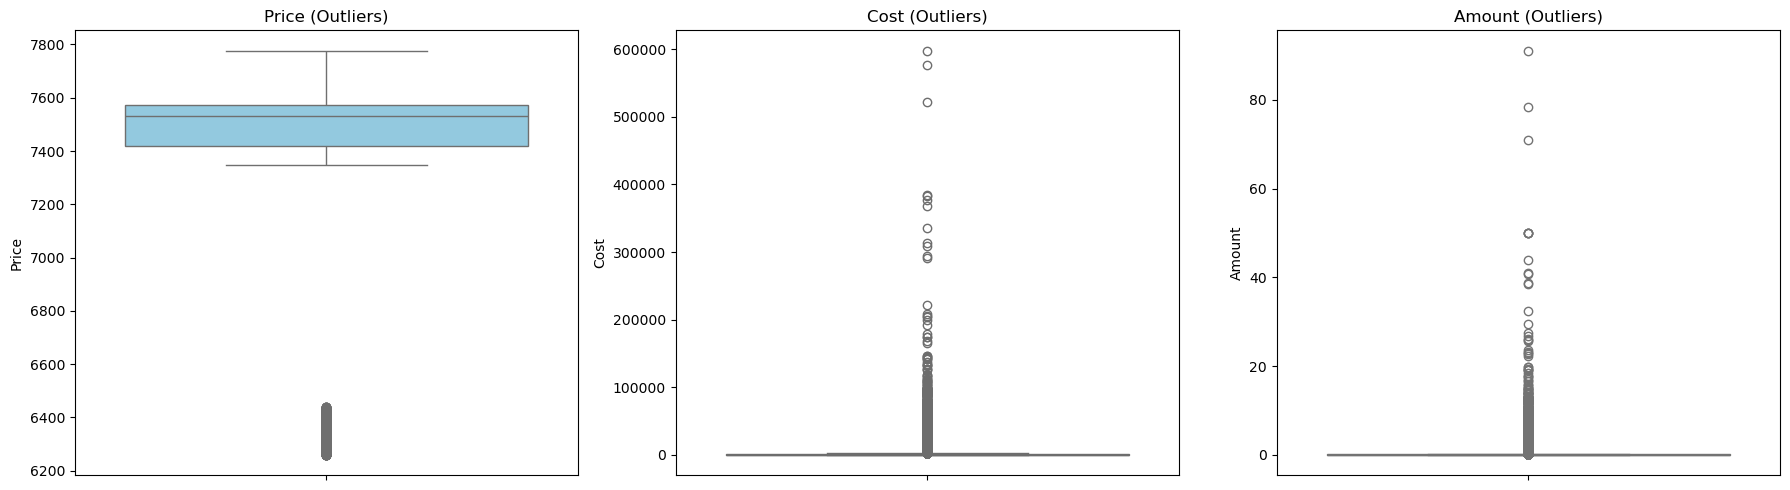

In [17]:
# Set up subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot boxplots
sns.boxplot(y=trx_df['price'], ax=axes[0], color='skyblue')
axes[0].set_title('Price (Outliers)')
axes[0].set_ylabel('Price')

sns.boxplot(y=trx_df['cost'], ax=axes[1], color='salmon')
axes[1].set_title('Cost (Outliers)')
axes[1].set_ylabel('Cost')

sns.boxplot(y=trx_df['amount'], ax=axes[2], color='lightgreen')
axes[2].set_title('Amount (Outliers)')
axes[2].set_ylabel('Amount')

plt.tight_layout()
plt.show()

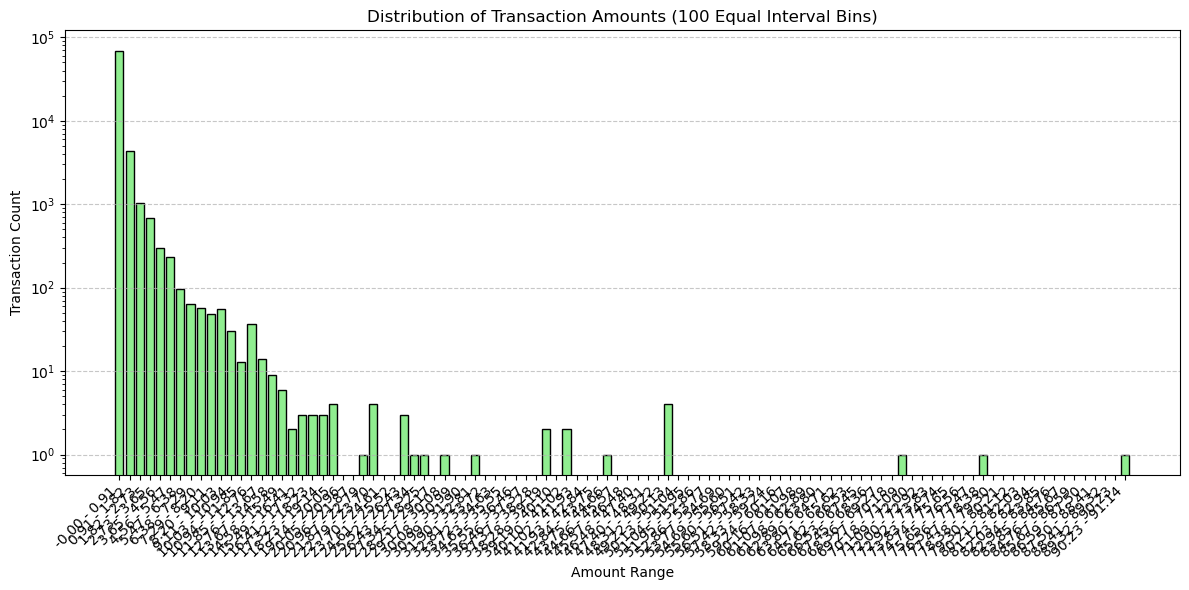

Transaction counts per amount range:
        amount_range  transaction_count
0    (-0.001, 0.911]              69483
1     (0.911, 1.823]               4402
2     (1.823, 2.734]               1028
3     (2.734, 3.646]                676
4     (3.646, 4.557]                298
..               ...                ...
95  (86.586, 87.498]                  0
96  (87.498, 88.409]                  0
97  (88.409, 89.321]                  0
98  (89.321, 90.232]                  0
99  (90.232, 91.144]                  1

[100 rows x 2 columns]

Total number of observations (transactions): 76590
Maximum amount used as upper bound: 91.14


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming trx_df is loaded with an 'amount' column
trx_df_clean = trx_df.dropna(subset=['amount'])

# Determine the maximum amount to set as the upper bound
max_amount = trx_df_clean['amount'].max()

# Create 100 equal-size bins from 0 to max_amount
amount_bins = np.linspace(0, max_amount, 101)  # 101 points to create 100 intervals

# Assign transactions to equal-size bins
trx_df_clean['amount_bin'] = pd.cut(trx_df_clean['amount'], bins=amount_bins, include_lowest=True)

# Count transactions per bin
amount_distribution = trx_df_clean['amount_bin'].value_counts().sort_index()

# Convert to DataFrame for plotting
amount_df = pd.DataFrame({
    'amount_range': amount_distribution.index,
    'transaction_count': amount_distribution.values
})

# Plot the distribution
plt.figure(figsize=(12, 6))
plt.bar(range(len(amount_df)), amount_df['transaction_count'], color='lightgreen', edgecolor='black')
plt.title('Distribution of Transaction Amounts (100 Equal Interval Bins)')
plt.xlabel('Amount Range')
plt.ylabel('Transaction Count')
plt.yscale('log')  # Log scale to highlight rare high-amount transactions
plt.xticks(range(len(amount_df)), [f"{b.left:,.2f} - {b.right:,.2f}" for b in amount_df['amount_range']], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Summary
print("Transaction counts per amount range:")
print(amount_df)
print(f"\nTotal number of observations (transactions): {len(trx_df_clean)}")
print(f"Maximum amount used as upper bound: {max_amount:,.2f}")